<Axes: ylabel='Density'>

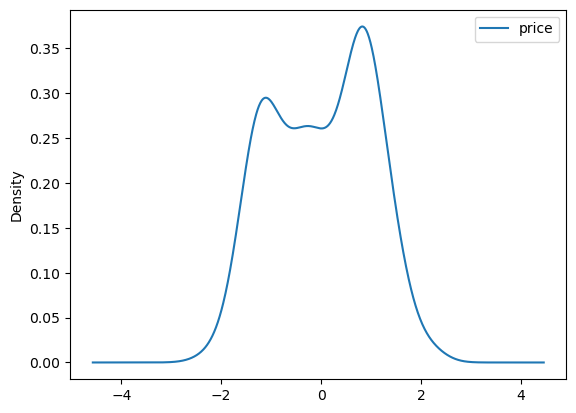

In [65]:
# Import libraries
import numpy as np
import pandas as pd
import torch

# clean up data: area, date, floor, price
def load_csv():
  return pd.read_csv('./data/2305_3rm_woodlands.csv')
def price_cleanup(df):
  df['price'] = df.price.apply(lambda x:float(x.replace('$','').replace(',','')) if isinstance(x,str) else x)
  return df
def area_cleanup(df):
  df['area'] = df.area.str.split('\n',expand=True)[0].astype(float) if df.area.dtype != 'float64' else df.area
  return df  
def date_cleanup(df):
  df['date'] = pd.to_datetime(df.date, format="%m/%d/%y")
  df['date'] = df.date.apply(lambda x:float(x.toordinal()) if not isinstance(x,float) else x)
  return df
floor_dict = { f'0{i*3+1} to 0{i*3+3}' if i < 3 else f'{i*3+1} to {i*3+3}': i*3+2  for i in range(11)  }
def floor_cleanup(df):
  df['floor'] = df.floor.apply(lambda x:float(floor_dict[x]) if isinstance(x,str) else x)
  return df

def load_and_cleanup():
  df = load_csv()
  price_cleanup(df)
  area_cleanup(df)
  date_cleanup(df)
  floor_cleanup(df)
  df.drop(["block", "street", "lease"], axis=1, inplace = True)
  return df

def get_xy():
  df = load_and_cleanup()
  y = torch.tensor(df.price)[:,None]
  df['date'] = df.date - 693595
  means = df.mean()
  stds = df.std()
  df = (df-means)/stds
  df['bias'] = 1
  xs = torch.tensor(df.drop("price", axis=1).values).float()
  return (xs, y, means, stds, df)

(xs, y, means, err, df) = get_xy()


def f(params):
  l1,l2,const = params
  res = torch.nn.functional.relu(xs@l1)
  res = res@l2+const
  return res + y.mean()
def mse(params):
  return (torch.square(f(params)-y)).mean()


df.plot(x="date", y="price", kind="kde")

array(['05/01/22', '06/01/22', '07/01/22', '08/01/22', '09/01/22',
       '10/01/22', '11/01/22', '12/01/22', '01/01/23', '02/01/23',
       '03/01/23', '04/01/23', '05/01/23'], dtype=object)

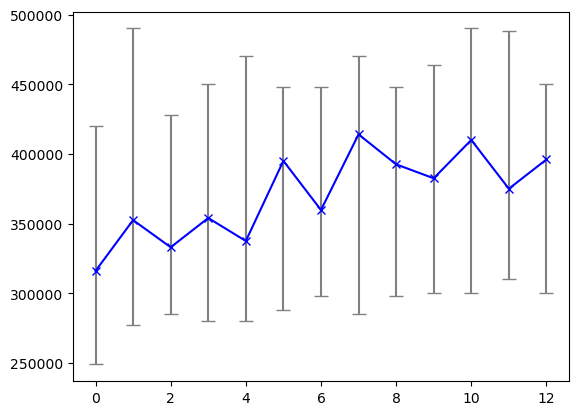

In [107]:
def load_and_cleanup2():
  df = load_csv()
  price_cleanup(df)
  area_cleanup(df)
  floor_cleanup(df)
  df.drop(["block", "street", "lease"], axis=1, inplace = True)
  return df
df = load_and_cleanup2()
#df.plot(x="date", y="price",kind="scatter")

df[df.date == "12/01/22"]
dates = np.flip(df.date.unique())
means = []
err1 = []
err2 = []
for date in dates:
  df1 = df[df.date==date]
  median = df1.price.median()
  means.append(median)
  err1.append(median - df1.price.min())
  err2.append(df1.price.max()- median)
import matplotlib
matplotlib.pyplot.errorbar(range(13),means,yerr=[err1,err2],capsize=5,ecolor='grey',fmt="bx-")
dates


In [60]:

# initialize params
n = 20
layer1 = (torch.rand(5,n)-0.5)/n
layer2 = torch.randn(n,1)
const = torch.rand(1)[0]

layer1.requires_grad_(),
layer2.requires_grad_(),
const.requires_grad_(),

lr = 1e-7

n = 20000
for i in range(n):
  loss = mse((layer1,layer2,const))
  loss.backward()
  print(f'loss{loss.sqrt()} loss rate {lr}')
  with torch.no_grad():
    layer1.sub_(layer1.grad * lr)
    layer2.sub_(layer2.grad * lr)
    const.sub_(const.grad * lr)
    #print(params)
    new_loss = mse((layer1,layer2,const))
  if (loss.sqrt() < 19000):
    lr = 1e-13
  elif (loss.sqrt() < 30000):
    lr = 1e-10
  #if (new_loss > loss):
  #  print(f'local min reached at {i}, {loss.sqrt()}')
  #  layer1 = layer1 + layer1.grad * lr
  #  layer2 = layer2 + layer2.grad * lr
  #  const  = const + const.grad * lr
  #  break
  #else:

print(f'loss {loss.sqrt()}')



loss53365.15946165738 loss rate 1e-07
loss53365.117245841575 loss rate 1e-07
loss53365.05532672187 loss rate 1e-07
loss53364.97660229647 loss rate 1e-07
loss53364.86830713957 loss rate 1e-07
loss53364.71310003737 loss rate 1e-07
loss53364.50502834813 loss rate 1e-07
loss53364.2394350969 loss rate 1e-07
loss53363.91124866104 loss rate 1e-07
loss53363.52313288176 loss rate 1e-07
loss53363.06805499769 loss rate 1e-07
loss53362.54376645507 loss rate 1e-07
loss53361.93921871757 loss rate 1e-07
loss53361.249300593954 loss rate 1e-07
loss53360.46224259165 loss rate 1e-07
loss53359.56790234258 loss rate 1e-07
loss53358.54351698393 loss rate 1e-07
loss53357.36971946538 loss rate 1e-07
loss53356.01842168597 loss rate 1e-07
loss53354.46148108578 loss rate 1e-07
loss53352.65490740801 loss rate 1e-07
loss53350.55352241579 loss rate 1e-07
loss53348.09639191873 loss rate 1e-07
loss53345.22223207967 loss rate 1e-07
loss53341.84220719622 loss rate 1e-07
loss53337.86280514351 loss rate 1e-07
loss53333.1